In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

style.use('seaborn-talk')

krfont = {'family':'Malgun Gothic', 'weight':'bold', 'size':10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

In [22]:
df = pd.read_csv("../data/housing.data", header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [23]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [24]:
lr = LinearRegression()
# 다항 특성 생성
quadratic = PolynomialFeatures(degree=2, include_bias=True)
cubic = PolynomialFeatures(degree=3, include_bias=True)

In [25]:
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

In [26]:
# 단순 회귀 계산
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
lr.fit(X, y)
y_lin_fit = lr.predict(X_fit)
l_r2 = r2_score(y, lr.predict(X))

In [27]:
# 2차 다항 회귀 모델 적용 후 계산
lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))
q_r2 = r2_score(y, lr.predict(X_quad))

In [28]:
# 3차 다항 회귀 모델 적용 후 계산
lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
c_r2 = r2_score(y, lr.predict(X_cubic))

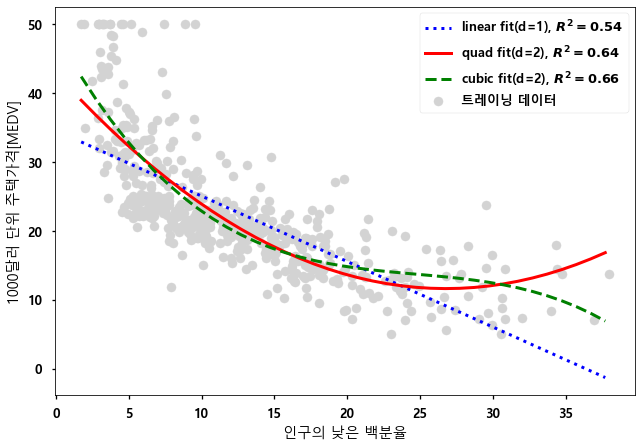

In [29]:
# 그래프 그리기
plt.scatter(X, y, label='트레이닝 데이터', c='lightgray')
plt.plot(X_fit, y_lin_fit, linestyle=':', label='linear fit(d=1), $R^2=%.2f$' %l_r2, c='blue', lw=3)
plt.plot(X_fit, y_quad_fit, linestyle='-', label='quad fit(d=2), $R^2=%.2f$' %q_r2, c='red', lw=3)
plt.plot(X_fit, y_cubic_fit, linestyle='--', label='cubic fit(d=2), $R^2=%.2f$' %c_r2, c='green', lw=3)

plt.xlabel('인구의 낮은 백분율')
plt.ylabel('1000달러 단위 주택가격[MEDV]')
plt.legend(loc=1)
plt.show()

In [30]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

In [31]:
X_fit = np.arange(X_log.min()-1, X_log.max()+1)[:, np.newaxis]

In [32]:
lr.fit(X_log, y_sqrt)
y_lin_fit = lr.predict(X_fit)
l_r2 = r2_score(y_sqrt, lr.predict(X_log))

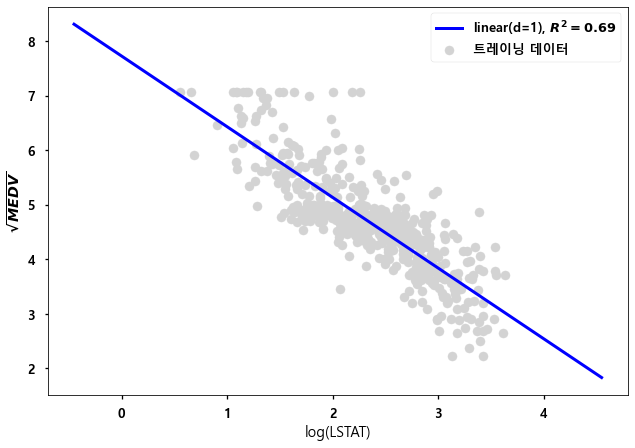

In [33]:
plt.scatter(X_log, y_sqrt, c='lightgray', label='트레이닝 데이터')
plt.plot(X_fit, y_lin_fit, c='blue', lw=3, label='linear(d=1), $R^2=%.2f$' %l_r2)

plt.xlabel('log(LSTAT)')
plt.ylabel('$\sqrt{MEDV}$')
plt.legend()
plt.show()

## 'LSTAT', 'NOX' 을 이용한 회귀
피어슨 상관관계에서 가장 양의 상관성을 보인 LSTAT와 NOX 두 변수를 이용해서 선형 예측을 수행한다.

In [85]:
X = df[['LSTAT', 'NOX']].values
y = df['MEDV'].values
X.shape

(506, 2)

In [86]:
lr = LinearRegression()

In [87]:
# 2차 다항 회귀 모델 적용 후 계산
lr.fit(X, y)
y_pred = lr.predict(X)
y_pred

array([29.88188517, 25.81617052, 30.72199825, 31.75697984, 29.46247333,
       29.57767868, 22.71495882, 16.26345934,  5.91417893, 18.2315507 ,
       15.01540141, 21.90852138, 19.56601265, 26.732939  , 24.81284987,
       26.53132964, 28.34581387, 20.57905334, 23.43998614, 23.83360441,
       14.48277035, 21.38549077, 16.69087285, 15.57722115, 19.01418069,
       18.81257134, 20.4446471 , 18.07333702, 22.37433667, 23.16157322,
       12.96589993, 22.14392598,  8.06007221, 17.04608934, 15.13560065,
       25.32902005, 23.66814295, 26.2026606 , 24.89699999, 30.40084475,
       32.64734904, 29.92247064, 28.99122741, 27.42635477, 25.40066074,
       24.76703133, 20.98445574, 16.52024851,  4.99011328, 19.01636438,
       21.64710486, 25.50648401, 29.49066895, 26.46652857, 20.32081356,
       29.90436159, 28.99001598, 30.73833954, 27.98839288, 25.72268771,
       21.94971257, 20.71125508, 28.11319868, 25.45387523, 26.80747334,
       30.03355557, 24.68610734, 26.75206969, 21.96144731, 26.08